In [1]:
from astropy import units as au
from astropy.coordinates import SkyCoord
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

obs_df = pd.read_csv('../../alert_docs/GalPlane/other_docs/GP_obsdetails.csv')

In [2]:
obs_df

,OBSERVATION.OBSERVATION_ID,OBSERVATION.TARGET,OBSERVATION.RA_NOM,OBSERVATION.DEC_NOM,OBSERVATION.REVOLUTION,OBSERVATION.START_UTC,OBSERVATION.END_UTC,OBSERVATION.DURATION,TARGET_TYPE.DESCRIPTION,PROPOSAL.PI_SURNAME,PROPOSAL.TYPE,OBSERVATION.PROPRIETARY_END_DATE,OBSERVATION.PPS_VERSION,OBSERVATION.COORD_OBS
0,886010101,MW Plane 1,17 39 04.37,-29 27 44.7,3893,2021-03-13 04:30:20.000,2021-03-13 14:17:00.000,35200,UNIDENTIFIED,Ponti,Multi-Year Heritage,2021-04-05 00:00:00.000,19.16_20210326_1200,NaN
1,886010201,MW Plane 2,17 41 18.22,-29 53 08.9,3898,2021-03-22 13:45:04.000,2021-03-22 20:08:24.000,23000,UNIDENTIFIED,Ponti,Multi-Year Heritage,2021-04-05 00:00:00.000,19.16_20210326_1200,NaN
2,886010301,MW Plane 3,17 39 40.41,-29 53 14.3,3898,2021-03-22 20:28:24.000,2021-03-23 02:51:44.000,23000,UNIDENTIFIED,Ponti,Multi-Year Heritage,2021-04-05 00:00:00.000,19.16_20210326_1200,NaN
3,886010401,MW Plane 4,17 45 45.47,-30 44 09.1,3895,2021-03-16 19:06:37.000,2021-03-17 01:29:57.000,23000,UNIDENTIFIED,Ponti,Multi-Year Heritage,2021-04-05 00:00:00.000,19.16_20210326_1200,NaN
4,886010501,MW Plane 5,17 43 52.99,-30 34 04.4,3895,2021-03-17 01:49:57.000,2021-03-17 08:13:17.000,23000,UNIDENTIFIED,Ponti,Multi-Year Heritage,2021-04-05 00:00:00.000,19.16_20210326_1200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,934210401,MW Plane 191,17 35 44.20,-32 27 26.0,4445,2024-03-17 19:11:29.000,2024-03-17 23:08:09.000,14200,UNIDENTIFIED,Ponti,Multi-Year Heritage,2024-04-08 00:00:00.000,21.23_20231215_1101,NaN
226,934210501,MW Plane 192,17 32 41.70,-33 56 01.4,4445,2024-03-17 04:19:49.000,2024-03-17 07:46:29.000,12400,UNIDENTIFIED,Ponti,Multi-Year Heritage,2024-04-08 00:00:00.000,21.23_20231215_1101,NaN
227,934210601,MW Plane 193,17 18 50.79,-36 50 21.6,4444,2024-03-15 18:48:28.000,2024-03-15 22:00:08.000,11500,UNIDENTIFIED,Ponti,Multi-Year Heritage,2024-04-04 00:00:00.000,21.23_20231215_1101,NaN
228,934210701,MW Plane 194,17 43 41.39,-30 10 12.3,4446,2024-03-19 06:10:56.000,2024-03-19 09:22:36.000,11500,UNIDENTIFIED,Ponti,Multi-Year Heritage,2024-04-05 00:00:00.000,21.23_20231215_1101,NaN


In [3]:
#add in locations of observation centres (radius 15')
obs_locs = []
obs_l = []
obs_b = []

for i in range(len(obs_df)):
    #pick out the observation centre
    ra = obs_df['OBSERVATION.RA_NOM'][i].split(" ")
    dec = obs_df['OBSERVATION.DEC_NOM'][i].split(" ")
    obs_coord = SkyCoord(ra[0]+'h'+ra[1]+'m'+ra[2]+'s'+dec[0]+'d'+dec[1]+'m'+dec[2]+'s')
    
    #convert the observation centre to galactic
    obs_locs.append(obs_coord.galactic)
    obs_l.append(obs_coord.galactic.l.deg)
    obs_b.append(obs_coord.galactic.b.deg)

In [4]:
#set ranges for the max and min RA/DEC for plotting
l_min = min(np.asarray(obs_l)[np.where(np.asarray(obs_l) > 180)])
l_max = max(np.asarray(obs_l)[np.where(np.asarray(obs_l) < 180)])
b_min = -2
b_max = 2

In [13]:
l_max

6.688519715317001

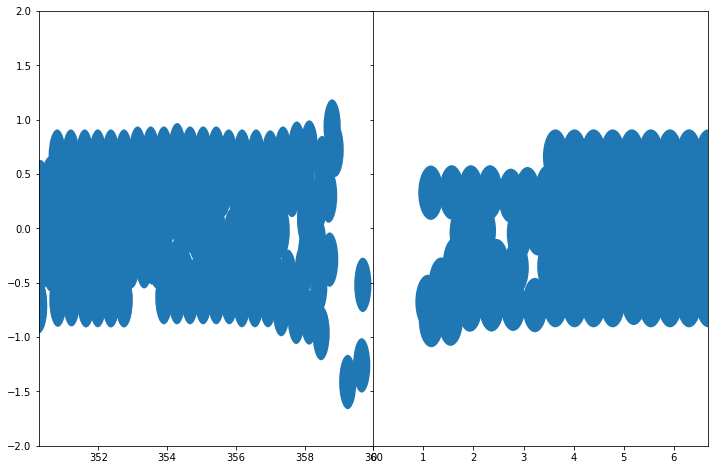

In [5]:
#Plot obs locations
fig, axs = plt.subplots(1,2,sharey=True)
fig.subplots_adjust(wspace=0)
axs[0].set_ylim(-2, 2)
axs[1].set_ylim(-2, 2)
axs[0].set_xlim(l_min, 360)
axs[1].set_xlim(0, l_max)
for obs in obs_locs:
    if obs.l.deg > 180:
        axs[0].add_patch(plt.Circle([obs.l.deg,obs.b.deg],radius=0.25))
    else:
        axs[1].add_patch(plt.Circle([obs.l.deg,obs.b.deg],radius=0.25))
plt.show()

In [6]:
#load locations of sources

srcs = np.loadtxt('../../alert_docs/GalPlane/other_docs/GP_srclocs.csv',delimiter=',',dtype='str')

In [7]:
#add in locations of sources
src_locs = []
src_l = []
src_b = []

for i in range(len(srcs)):
    ra = srcs[i][0].split(":")
    dec = srcs[i][1].split(":")
    src_coord = SkyCoord(ra[0]+'h'+ra[1]+'m'+ra[2]+'s'+dec[0]+'d'+dec[1]+'m'+dec[2]+'s')
    
    #convert the observation centre to galactic
    src_locs.append(src_coord.galactic)
    src_l.append(src_coord.galactic.l.deg)
    src_b.append(src_coord.galactic.b.deg)

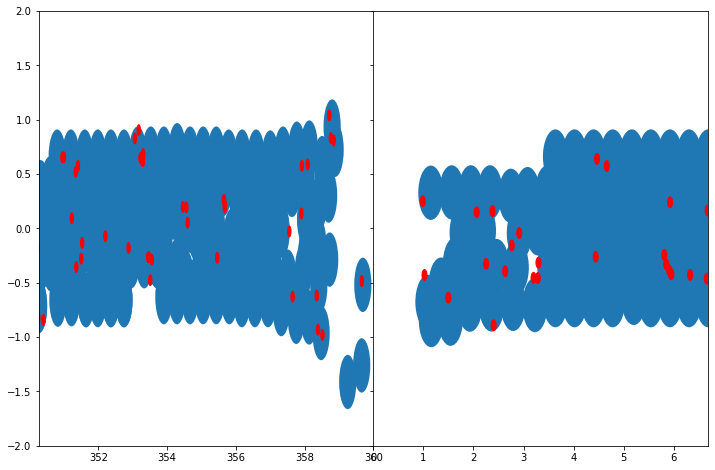

In [8]:
#Plot obs locations
fig, axs = plt.subplots(1,2,sharey=True)
fig.subplots_adjust(wspace=0)
axs[0].set_ylim(-2, 2)
axs[1].set_ylim(-2, 2)
axs[0].set_xlim(l_min, 360)
axs[1].set_xlim(0, l_max)
for obs in obs_locs:
    if obs.l.deg > 180:
        axs[0].add_patch(plt.Circle([obs.l.deg,obs.b.deg],radius=0.25))
    else:
        axs[1].add_patch(plt.Circle([obs.l.deg,obs.b.deg],radius=0.25))
        
for src in src_locs:
    if src.l.deg > 180:
        axs[0].add_patch(plt.Circle([src.l.deg,src.b.deg],color='r',radius=0.05))
    else:
        axs[1].add_patch(plt.Circle([src.l.deg,src.b.deg],color='r',radius=0.05))
plt.show()

In [11]:
np.savetxt('obs_footprints.csv',np.asarray((obs_l,obs_b)),delimiter=',')
np.savetxt('src_locs.csv',np.asarray((src_l,src_b)),delimiter=',')